## Exercício 01
Implementar a classificação do dataset Iris utilizando logica fuzzy e algorimos genéticos.
Usar o algortimo genético para otimizar os valores dos conjuntos fuzzy.

De acordo com o paper:
- Implementing a Fuzzy Classifier and Improving its Performance Using Genetic Algorithm, de Stig-Åke Svensson


In [1]:
import skfuzzy as fuzz
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# import Iris dataset
iris = datasets.load_iris() 
X = iris.data
y = iris.target

x_sepallength = X[:,0]
x_sepalwidth = X[:,1]
x_petallength = X[:,2]
x_petalwidth = X[:,3]

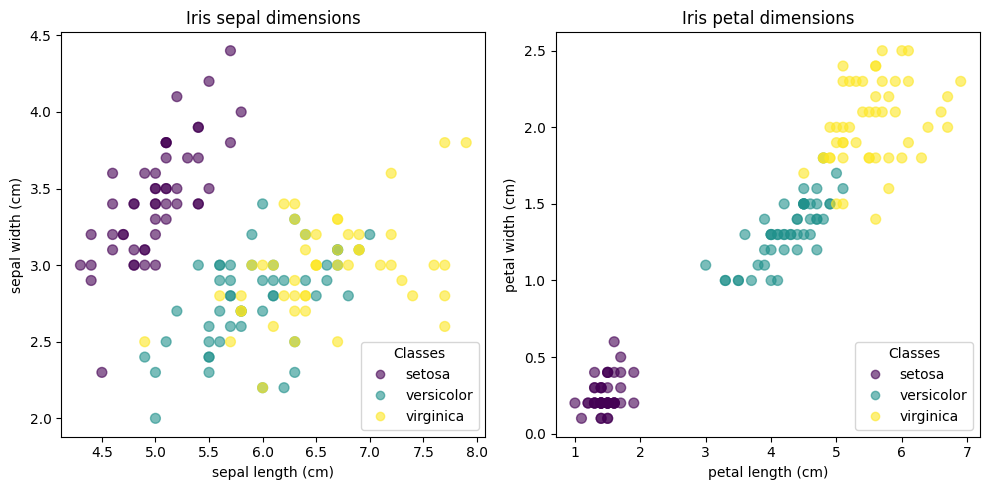

In [2]:
# Plotando os dados

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

# Plot for sepal
scatter_sepal = axs[0].scatter(x_sepallength, x_sepalwidth, c=y, s=50, cmap="viridis", alpha=0.6)
axs[0].set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
axs[0].legend(scatter_sepal.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")
axs[0].set_title("Iris sepal dimensions")

# Plot for petal
scatter_petal = axs[1].scatter(x_petallength, x_petalwidth, c=y, s=50, cmap="viridis", alpha=0.6)
axs[1].set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
axs[1].legend(scatter_petal.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")
axs[1].set_title("Iris petal dimensions")

plt.tight_layout()
plt.show()

## Implmentando a Lógica Fuzzy

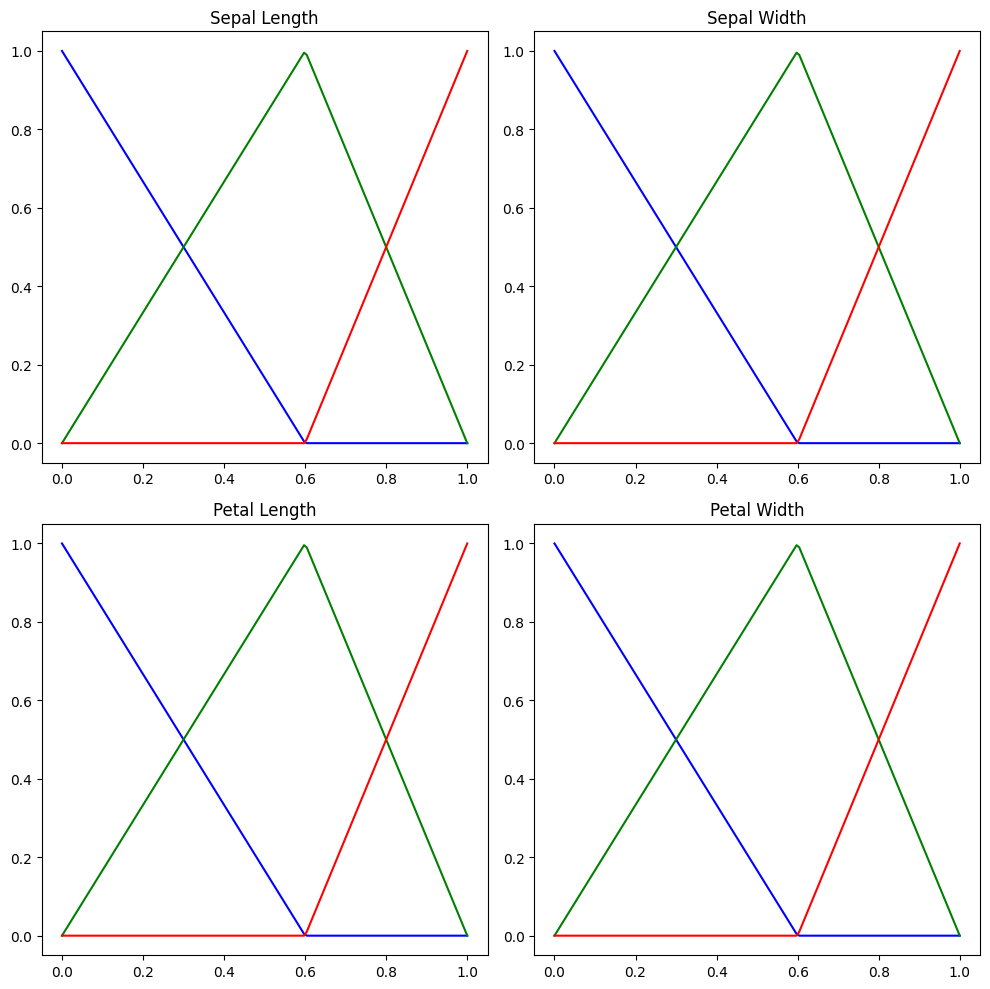

In [3]:
# Generate fuzzy membership functions

"""
During the fuzzification process each input parameter will be
mapped to the three fuzzy sets using these membership functions:

Short:
Short = 0 if x < 0
Short = 1 - x/0.6 if 0 <= x <= 0.6
Short = 0 if x > 0.6

Middle:
Middle = 0 if x < 0
Middle = x/0.6 if 0 <= x <= 0.6
Middle = (1 + 0.6/0.4) - x/0.4 if 0.6 <= x <= 1
Middle = 0 if x > 1

Long:
Long = 0 if x < 0.6
Long = x/0.4 - (1/0.4 - 1) if 0.6 <= x <= 1
Long = 0 if x > 1
"""

sepallength = np.linspace(0, 1, 150)
sepalwidth = np.linspace(0, 1, 150)
petallength = np.linspace(0, 1, 150)
petalwidth = np.linspace(0, 1, 150)

# following the above rules, we can define the membership functions
short_sepallength = fuzz.trimf(sepallength, [0, 0, 0.6])
middle_sepallength = fuzz.trimf(sepallength, [0, 0.6, 1])
long_sepallength = fuzz.trimf(sepallength, [0.6, 1, 1])

short_sepalwidth = fuzz.trimf(sepalwidth, [0, 0, 0.6])
middle_sepalwidth = fuzz.trimf(sepalwidth, [0, 0.6, 1])
long_sepalwidth = fuzz.trimf(sepalwidth, [0.6, 1, 1])

short_petallength = fuzz.trimf(petallength, [0, 0, 0.6])
middle_petallength = fuzz.trimf(petallength, [0, 0.6, 1])
long_petallength = fuzz.trimf(petallength, [0.6, 1, 1])

short_petalwidth = fuzz.trimf(petalwidth, [0, 0, 0.6])
middle_petalwidth = fuzz.trimf(petalwidth, [0, 0.6, 1])
long_petalwidth = fuzz.trimf(petalwidth, [0.6, 1, 1])

# Visualize these universes and membership functions
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

axs[0, 0].plot(sepallength, short_sepallength, 'b', linewidth=1.5, label='Short')
axs[0, 0].plot(sepallength, middle_sepallength, 'g', linewidth=1.5, label='Middle')
axs[0, 0].plot(sepallength, long_sepallength, 'r', linewidth=1.5, label='Long')
axs[0, 0].set_title('Sepal Length')

axs[0, 1].plot(sepalwidth, short_sepalwidth, 'b', linewidth=1.5, label='Short')
axs[0, 1].plot(sepalwidth, middle_sepalwidth, 'g', linewidth=1.5, label='Middle')
axs[0, 1].plot(sepalwidth, long_sepalwidth, 'r', linewidth=1.5, label='Long')
axs[0, 1].set_title('Sepal Width')

axs[1, 0].plot(petallength, short_petallength, 'b', linewidth=1.5, label='Short')
axs[1, 0].plot(petallength, middle_petallength, 'g', linewidth=1.5, label='Middle')
axs[1, 0].plot(petallength, long_petallength, 'r', linewidth=1.5, label='Long')
axs[1, 0].set_title('Petal Length')

axs[1, 1].plot(petalwidth, short_petalwidth, 'b', linewidth=1.5, label='Short')
axs[1, 1].plot(petalwidth, middle_petalwidth, 'g', linewidth=1.5, label='Middle')
axs[1, 1].plot(petalwidth, long_petalwidth, 'r', linewidth=1.5, label='Long')
axs[1, 1].set_title('Petal Width')

plt.tight_layout()
plt.show()


In [4]:
# Normalize data

x_sepallength = (x_sepallength - x_sepallength.min()) / (x_sepallength.max() - x_sepallength.min())
x_sepalwidth = (x_sepalwidth - x_sepalwidth.min()) / (x_sepalwidth.max() - x_sepalwidth.min())
x_petallength = (x_petallength - x_petallength.min()) / (x_petallength.max() - x_petallength.min())
x_petalwidth = (x_petalwidth - x_petalwidth.min()) / (x_petalwidth.max() - x_petalwidth.min())


In [5]:
# Fuzzification

sepallength_level_short = fuzz.interp_membership(sepallength, short_sepallength, x_sepallength)
sepallength_level_middle = fuzz.interp_membership(sepallength, middle_sepallength, x_sepallength)
sepallength_level_long = fuzz.interp_membership(sepallength, long_sepallength, x_sepallength)

sepalwidth_level_short = fuzz.interp_membership(sepalwidth, short_sepalwidth, x_sepalwidth)
sepalwidth_level_middle = fuzz.interp_membership(sepalwidth, middle_sepalwidth, x_sepalwidth)
sepalwidth_level_long = fuzz.interp_membership(sepalwidth, long_sepalwidth, x_sepalwidth) 

petallength_level_short = fuzz.interp_membership(petallength, short_petallength, x_petallength)   
petallength_level_middle = fuzz.interp_membership(petallength, middle_petallength, x_petallength)
petallength_level_long = fuzz.interp_membership(petallength, long_petallength, x_petallength)

petalwidth_level_short = fuzz.interp_membership(petalwidth, short_petalwidth, x_petalwidth)
petalwidth_level_middle = fuzz.interp_membership(petalwidth, middle_petalwidth, x_petalwidth)
petalwidth_level_long = fuzz.interp_membership(petalwidth, long_petalwidth, x_petalwidth)


In [7]:
# Fuzzy rules

"""
let x1 = sepallength and x2 = sepalwidth and x3 = petallength and x4 = petalwidth

R1: IF (x1=short OR long) and (x2=middle OR long) and (x3=middle OR long) and (x4=middle OR long) THEN iris=versicolor
R2: IF (x3=short OR middle) and (x4=short) THEN iris=setosa
R3: IF (x2=short OR middle) and (x3=long) and (x4=long) THEN iris=verginica
R4: IF (x1=middle) and (x2=short OR middle) and (x3=short) and (x4=long) THEN iris=versicolor
"""

r1_a = np.fmax(sepallength_level_short, sepallength_level_long)
r1_b = np.fmax(sepalwidth_level_middle, sepalwidth_level_long)
r1_c = np.fmax(petallength_level_middle, petallength_level_long)
r1_d = np.fmax(petalwidth_level_middle, petalwidth_level_long)
r1 = np.fmin(r1_a, np.fmin(r1_b, np.fmin(r1_c, r1_d)))

r2_a = np.fmax(petallength_level_short, petallength_level_middle)
r2_b = petalwidth_level_short
r2 = np.fmin(r2_a, r2_b)

r3_a = np.fmax(sepalwidth_level_short, sepalwidth_level_middle)
r3_b = petallength_level_long
r3_c = petalwidth_level_long
r3 = np.fmin(r3_a, np.fmin(r3_b, r3_c))

r4_a = sepallength_level_middle
r4_b = np.fmax(sepalwidth_level_short, sepalwidth_level_middle)
r4_c = petallength_level_short
r4_d = petalwidth_level_long
r4 = np.fmin(r4_a, np.fmin(r4_b, np.fmin(r4_c, r4_d)))


In [8]:
# Rule set outputs

"""
The value received from this calculation will be in the interval [0,
1] and represent the degree of belonging of the current set of input
data to the specific flower specie to which the rule corresponds.
Each rule will result in an output that is a set that is as follows. 

FR={a / Setosa, b / Versicolor , c / Virginica }

Where a, b and c is the degree to which the rule determines that
the current input parameters belong to the species Setosa,
Versicolor and Virginica respectively.
"""

f_r1 = np.array([(0, r1, 0) for r1 in r1])
f_r2 = np.array([(r2, 0, 0) for r2 in r2])
f_r3 = np.array([(0, 0, r3) for r3 in r3])
f_r4 = np.array([(0, r4, 0) for r4 in r4])


# Decision Making Logic
"""
Since each rule will give a set as output it
is possible to combine these sets into a single set.

This is done by applying a logical or-function to the outputted sets from the fuzzy
rules as follows.

F = F1 OR F2 OR F3 OR F4 = (suggestion_setosa, suggestion_versicolor, suggestion_virginica)

Then we choose the class with the highest value in the set F.
"""

f = np.fmax(f_r1, np.fmax(f_r2, np.fmax(f_r3, f_r4)))

In [9]:
y_hat = np.argmax(f, axis=1)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1])

In [10]:
accuracy = np.mean(y_hat == y)
accuracy

0.74

### Resultado da Classificação Fuzzy

```
A acurácia obtida foi de 0.74, similar aos resultados obtidos no paper (0.77).
```


## Implementação do Algortimo Genético

In [11]:
# GA Implementation

"""
To improve the fuzzy classifier of the membership functions, we will use Genetic Algorithms.
"""

import random

def generate_population(n_individuals, n_genes):
    population = []
    for _ in range(n_individuals):
        individual = []
        for _ in range(n_genes):
            individual.append(random.uniform(0, 1))
        population.append(individual)
    return population

In [12]:
# Fitness
"""
To determine the fitness of each individual the solution of the
individual is tested against the entire iris data set.

The fitness of the individual is then determined by how accurate its solution is.
"""

# import Iris dataset
iris = datasets.load_iris() 
X = iris.data
y = iris.target

x_sepallength = X[:,0]
x_sepalwidth = X[:,1]
x_petallength = X[:,2]
x_petalwidth = X[:,3]

# Normalize data

x_sepallength = (x_sepallength - x_sepallength.min()) / (x_sepallength.max() - x_sepallength.min())
x_sepalwidth = (x_sepalwidth - x_sepalwidth.min()) / (x_sepalwidth.max() - x_sepalwidth.min())
x_petallength = (x_petallength - x_petallength.min()) / (x_petallength.max() - x_petallength.min())
x_petalwidth = (x_petalwidth - x_petalwidth.min()) / (x_petalwidth.max() - x_petalwidth.min())

sepallength = np.linspace(0, 1, 150)
sepalwidth = np.linspace(0, 1, 150)
petallength = np.linspace(0, 1, 150)
petalwidth = np.linspace(0, 1, 150)

def fit(individual):
    W1, W2, W3, W4 = individual

    # membership functions
    short_sepallength = fuzz.trimf(sepallength, [0, 0, W1])
    middle_sepallength = fuzz.trimf(sepallength, [0, W1, 1])
    long_sepallength = fuzz.trimf(sepallength, [W1, 1, 1])

    short_sepalwidth = fuzz.trimf(sepalwidth, [0, 0, W2])
    middle_sepalwidth = fuzz.trimf(sepalwidth, [0, W2, 1])
    long_sepalwidth = fuzz.trimf(sepalwidth, [W2, 1, 1])

    short_petallength = fuzz.trimf(petallength, [0, 0, W3])
    middle_petallength = fuzz.trimf(petallength, [0, W3, 1])
    long_petallength = fuzz.trimf(petallength, [W3, 1, 1])

    short_petalwidth = fuzz.trimf(petalwidth, [0, 0, W4])
    middle_petalwidth = fuzz.trimf(petalwidth, [0, W4, 1])
    long_petalwidth = fuzz.trimf(petalwidth, [W4, 1, 1])

    # Fuzzification
    sepallength_level_short = fuzz.interp_membership(sepallength, short_sepallength, x_sepallength)
    sepallength_level_middle = fuzz.interp_membership(sepallength, middle_sepallength, x_sepallength)
    sepallength_level_long = fuzz.interp_membership(sepallength, long_sepallength, x_sepallength)

    sepalwidth_level_short = fuzz.interp_membership(sepalwidth, short_sepalwidth, x_sepalwidth)
    sepalwidth_level_middle = fuzz.interp_membership(sepalwidth, middle_sepalwidth, x_sepalwidth)
    sepalwidth_level_long = fuzz.interp_membership(sepalwidth, long_sepalwidth, x_sepalwidth) 

    petallength_level_short = fuzz.interp_membership(petallength, short_petallength, x_petallength)   
    petallength_level_middle = fuzz.interp_membership(petallength, middle_petallength, x_petallength)
    petallength_level_long = fuzz.interp_membership(petallength, long_petallength, x_petallength)

    petalwidth_level_short = fuzz.interp_membership(petalwidth, short_petalwidth, x_petalwidth)
    petalwidth_level_middle = fuzz.interp_membership(petalwidth, middle_petalwidth, x_petalwidth)
    petalwidth_level_long = fuzz.interp_membership(petalwidth, long_petalwidth, x_petalwidth)

    # Fuzzy rules
    r1_a = np.fmax(sepallength_level_short, sepallength_level_long)
    r1_b = np.fmax(sepalwidth_level_middle, sepalwidth_level_long)
    r1_c = np.fmax(petallength_level_middle, petallength_level_long)
    r1_d = np.fmax(petalwidth_level_middle, petalwidth_level_long)
    r1 = np.fmin(r1_a, np.fmin(r1_b, np.fmin(r1_c, r1_d)))

    r2_a = np.fmax(petallength_level_short, petallength_level_middle)
    r2_b = petalwidth_level_short
    r2 = np.fmin(r2_a, r2_b)

    r3_a = np.fmax(sepalwidth_level_short, sepalwidth_level_middle)
    r3_b = petallength_level_long
    r3_c = petalwidth_level_long
    r3 = np.fmin(r3_a, np.fmin(r3_b, r3_c))

    r4_a = sepallength_level_middle
    r4_b = np.fmax(sepalwidth_level_short, sepalwidth_level_middle)
    r4_c = petallength_level_short
    r4_d = petalwidth_level_long
    r4 = np.fmin(r4_a, np.fmin(r4_b, np.fmin(r4_c, r4_d)))

    # Rule set outputs
    f_r1 = np.array([(0, r1, 0) for r1 in r1])
    f_r2 = np.array([(r2, 0, 0) for r2 in r2])
    f_r3 = np.array([(0, 0, r3) for r3 in r3])
    f_r4 = np.array([(0, r4, 0) for r4 in r4])

    # Decision Making Logic
    f = np.fmax(f_r1, np.fmax(f_r2, np.fmax(f_r3, f_r4)))

    # Predict
    y_hat = np.argmax(f, axis=1)
    accuracy = np.mean(y_hat == y)
    return accuracy

In [13]:
# Select pairs of individuals to mate based on roulette wheel selection

def roulette_wheel_selection(population, mating_pool_size):
    mating_pool = []
    for _ in range(mating_pool_size):
        r = random.random()
        acc = 0
        for individual in population:
            acc += individual[-1]
            if acc > r:
                mating_pool.append(individual)
                break
    return mating_pool  


In [19]:
# Recombination

"""
Once a mating pool has been created pairs of individuals are
created. Individuals where paired together by individually pairing
the first half of the mating pool with the inverted second half. The
first individual is paired with the last individual, second first with
the second last et cetera
"""

def recombination(mating_pool):
    children = []
    for i in range(0, len(mating_pool), 2):
        parent1 = mating_pool[i]
        parent2 = mating_pool[-(i+1)]
        child = parent1[:2] + parent2[2:]
        children.append(child)
    return children

"""
Once pairs have been chosen each pair of individuals may be
recombined into a new pair. This is determined by the crossover
rate. The crossover rate is the probability that a pair will be
recombined. In the case where the pair isn’t recombined the
individuals are transferred as they are to the next stage.

In the case of a recombination, two new individuals are created by
a linear combination of the two strings of real values representing
the solution of the parents. The two new strings are created using
the following formulas.

x_new = alpha_1 * x_old + y_old * (1 - alpha_1)
y_new = alpha_2 * x_old + y_old * (1 - alpha_2)

where alpha_1 and alpha_2 are random numbers between 0 and 1.
"""

def crossover(parent1, parent2, alpha_1, alpha_2):
    child1 = [alpha_1 * parent1[i] + parent2[i] * (1 - alpha_1) for i in range(len(parent1))]
    child2 = [alpha_2 * parent1[i] + parent2[i] * (1 - alpha_2) for i in range(len(parent1))]
    return child1, child2


In [15]:
# Mutation
    
"""
When the new population has been created each individual in the
population is mutated. The mutation is done by randomizing a
value between minus one and one. This is then multiplied with a
program parameter, mutation multiplier, to limit the effect of the
mutation. This is then added to each value in an individual’s
string of real values to create a new mutated string. This
calculation is done for each individual in the new population.
"""

def mutate(individual, mutation_multiplier=0.05):
    mutated = [gene + random.uniform(-1, 1) * mutation_multiplier for gene in individual]
    mutated = np.clip(mutated, 0, 1)
    return mutated

In [39]:
# Next generation

"""
Creating the next generation is done by comparing the fitness
individuals of the old population with that of the fitness of the
newly recombined and mutated population. Out of these two
populations the individuals with the best fitness are selected one
by one until a new population equal in size to the original
population has been created.
"""

def next_generation(population, new_population):
    population.extend(new_population)
    population.sort(key=lambda x: x[4], reverse=True)
    return population[:10]

In [40]:
def survival_of_the_fittest(population, num_generations, crossover_rate=0.9, mutation_multiplier=0.05):
    alpha_1 = random.uniform(0, 1)
    alpha_2 = random.uniform(0, 1)

    for gen in range(num_generations):
        
        population_ = []
        # Calculate fitness
        for individual in population:
            fitness = fit(individual[:4])
            individual = individual[:4] + [fitness]
            population_.append(individual)

        # Selecting individuals for the mating pool
        fitness = [individual[-1] for individual in population_]
        total_fitness = sum(fitness)

        for individual in population_:
            prob = individual[-1] / total_fitness
            individual.append(prob)

        # Select pairs of individuals to mate based on roulette wheel selection
        mating_pool = roulette_wheel_selection(population_, len(population_))

        # Recombination
        children = recombination(mating_pool)

        # Crossover
        new_population = []
        for i in range(0, len(children)-1, 1):
            if random.random() < crossover_rate:
                child1, child2 = crossover(children[i][:4], children[i+1][:4], alpha_1, alpha_2)
                new_population.append(child1)
                new_population.append(child2)
            else:
                new_population.append(children[i][:4])
                new_population.append(children[i+1][:4])

        # Mutation
        new_population = [mutate(individual, mutation_multiplier) for individual in new_population]

        # Recalculate fitness of new population
        new_population_refit = []
        for individual in new_population:
            w1, w2, w3, w4 = individual[:4]
            individual = [w1, w2, w3, w4, fit(individual[:4])]
            new_population_refit.append(individual)

        # Next generation
        population = next_generation(population_, new_population_refit)
        
        print(f"Generation: {gen}, Best fitness: {population[0][4]}")
    
    # Return the best individual
    return population[0]


In [77]:
population = generate_population(n_individuals=10, n_genes=4)
best_individual = survival_of_the_fittest(population, num_generations=20)

Generation: 0, Best fitness: 0.9
Generation: 1, Best fitness: 0.9
Generation: 2, Best fitness: 0.9
Generation: 3, Best fitness: 0.9333333333333333
Generation: 4, Best fitness: 0.9333333333333333
Generation: 5, Best fitness: 0.9333333333333333
Generation: 6, Best fitness: 0.9333333333333333
Generation: 7, Best fitness: 0.9333333333333333
Generation: 8, Best fitness: 0.9333333333333333
Generation: 9, Best fitness: 0.94
Generation: 10, Best fitness: 0.94
Generation: 11, Best fitness: 0.94
Generation: 12, Best fitness: 0.94
Generation: 13, Best fitness: 0.94
Generation: 14, Best fitness: 0.94
Generation: 15, Best fitness: 0.94
Generation: 16, Best fitness: 0.94
Generation: 17, Best fitness: 0.94
Generation: 18, Best fitness: 0.94
Generation: 19, Best fitness: 0.9466666666666667
